<a href="https://colab.research.google.com/github/Ayush-rawat7/Chatbot-with-Python-NLTK/blob/main/Chatbot_with_Python%2BNLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**A Chatbot talking about Blockchain Technology**

# ***#How a ChatBot Works***

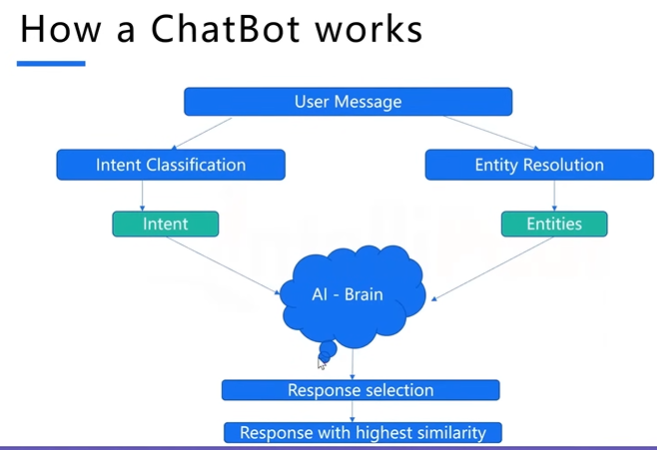

#**Data Extraction**

**Import Necessary Libraries**

In [1]:
import  numpy as np
import random
import nltk
import string


**Reading the Corpus Of text**

In [2]:
f = open('/content/drive/MyDrive/Colab Notebooks/Chatbot with Nltk/Blockchain.txt','r',errors='ignore')
raw_doc = f.read()


In [3]:
raw_doc #This is a about Blockchain Technology.

'@RAWAT’S\nBLOCKCHAIN \nTECHNOLOGY \nNOTES\nIntroduction to Blockchain\n1. What is Blockchain?\n• Definition: Blockchain is a decentralized digital ledger that records \ntransactions across multiple computers in a way that ensures the data is \nsecure, transparent, and cannot be altered retroactively.\n• Key Features:\no Decentralized: No single entity controls the blockchain. It is \nmaintained by a network of computers (nodes).\no Immutable: Once data is recorded, it cannot be changed or deleted.\no Transparent: All participants in the network can view the \ntransactions.\n• Example: Think of a blockchain like a shared Google Doc. Everyone can see \nthe changes, but no one can delete or alter what has already been written.\n2. How Does Blockchain Work?\n• Blocks: Data is stored in blocks. Each block contains:\no A list of transactions.\no A unique code called a hash (like a fingerprint).\no The hash of the previous block (this links the blocks together, forming \na chain).\n• Process

#**Pre-processing the text data in our .txt file**

---



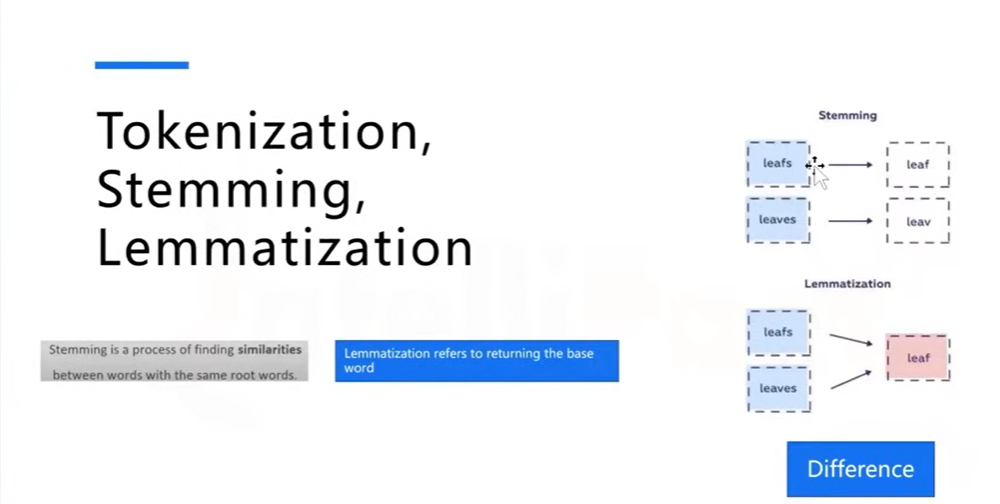

In [4]:
raw_doc = raw_doc.lower()   #converting all texts to lowercase
nltk.download('punkt_tab')      #Using the punkt Tokenizer
nltk.download('wordnet')    #Using the wordnet Dictionary
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
raw_doc

'@rawat’s\nblockchain \ntechnology \nnotes\nintroduction to blockchain\n1. what is blockchain?\n• definition: blockchain is a decentralized digital ledger that records \ntransactions across multiple computers in a way that ensures the data is \nsecure, transparent, and cannot be altered retroactively.\n• key features:\no decentralized: no single entity controls the blockchain. it is \nmaintained by a network of computers (nodes).\no immutable: once data is recorded, it cannot be changed or deleted.\no transparent: all participants in the network can view the \ntransactions.\n• example: think of a blockchain like a shared google doc. everyone can see \nthe changes, but no one can delete or alter what has already been written.\n2. how does blockchain work?\n• blocks: data is stored in blocks. each block contains:\no a list of transactions.\no a unique code called a hash (like a fingerprint).\no the hash of the previous block (this links the blocks together, forming \na chain).\n• process

In [6]:
#Doing Tokenization
sentence_tokens = nltk.sent_tokenize(raw_doc)
word_tokens = nltk.word_tokenize(raw_doc)

In [7]:
#After Tokenization

sentence_tokens[:5]

['@rawat’s\nblockchain \ntechnology \nnotes\nintroduction to blockchain\n1. what is blockchain?',
 '• definition: blockchain is a decentralized digital ledger that records \ntransactions across multiple computers in a way that ensures the data is \nsecure, transparent, and cannot be altered retroactively.',
 '• key features:\no decentralized: no single entity controls the blockchain.',
 'it is \nmaintained by a network of computers (nodes).',
 'o immutable: once data is recorded, it cannot be changed or deleted.']

In [8]:
word_tokens[:5]

['@', 'rawat', '’', 's', 'blockchain']

**Performing text preProcessing steps.**


In [9]:
#Using Lemmatization and Tokenization
#lemmatization is the process of reducing a word to its base or dictionary form

lemmer = nltk.stem.WordNetLemmatizer()   #WordNetLemmatizer is a class that provides methods to perform lemmatization.
def LemTokens(tokens):
  return [lemmer.lemmatize(token) for token in tokens]  #For each token in the tokens list, the lemmatize() method of the lemmer object (created earlier) is called. This method reduces each token to its lemma.
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
  return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

#nltk.word_tokenize(...): The word_tokenize() function from nltk is used to split the text into a list of words. This is tokenization.
#LemTokens(...): The LemTokens function (defined earlier) is called on the list of words from the previous step. This performs lemmatization on each word.


**Define Greeting Functions**

In [10]:
greet_inputs = (
    'hello', 'hi', 'whassup', 'hey', 'how are you?',  # initial inputs
    'good morning', 'good afternoon', 'good evening', 'hello there', 'greetings', 'how do you do', 'pleased to meet you', 'it\'s nice to meet you',  # Formal
    'hey there', 'hi there', 'howdy', 'what\'s up', 'sup', 'yo', 'how\'s it going', 'how\'s everything', 'long time no see', 'what\'s new', 'hi friend', # Informal
    'how are you doing', 'how are things', 'how have you been', 'how\'s your day going', 'hope you\'re doing well', 'how\'s life treating you', # Well-being
    'hello!', 'hey!', 'hi!!', 'great to see you', 'good to see you', # Enthusiastic
    'how\'s tricks', 'what\'s shaking', 'how goes it', 'what\'s cooking', # slang/casual
)

greet_responses = (
    'hii', 'hey there!', 'Am fine,What about You?',  # initial responses
    'Good day to you!', 'Good morning!', 'Good afternoon!', 'Good evening!', 'Greetings!', 'How do you do?', 'Pleased to meet you as well!', 'It\'s a pleasure to meet you.', 'Hello to you too.', # Formal
    'Hey!', 'Hi there!', 'Howdy!', 'What\'s up!', 'Not much, what about you?', 'Hey, what\'s new?', 'It\'s going well, thanks!', 'Long time no see!', 'Hey friend!', 'Hey bud!', # Informal
    'I\'m doing well, thank you for asking.', 'Things are going great!', 'I\'ve been well, how about you?', 'I am well and you?', 'Hope you are too!', 'Life is treating me nicely, thanks!', 'My day\'s going great. How about yours?', # Well-being
    'Hello!', 'Hey!!', 'Hi!', 'Great to see you too!', 'Good to see you!', # Enthusiastic
    'All good on this end.', 'Same old, same old.', 'Everything\'s good. What about you?', 'Not a lot. How about you?', #slang/casual
    'Goodbye!', 'See you later!', 'Farewell!', 'Bye!' #farewells as greetings
)

def greet(sentence):
  for word in sentence.split():
    if word.lower() in greet_inputs:
      return random.choice(greet_responses)

**Response generation By the BOT**

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import  cosine_similarity

#The TfidfVectorizer does 3 things. It counts the words, it calculates the TF-IDF score, and it row normalizes the vector.

#TfidfVectorizer converts text into numerical vectors, giving a higher value to words that are more important in a specific document.

#cosine_similarity is then used to compare these vectors. Documents with similar word importance vectors will have a higher cosine similarity score.

#**Creating a function to generate response to every user**

In [12]:
# --- Initialize Data Structures ---
sentence_tokens = nltk.sent_tokenize(raw_doc)  # Initial sentences from the raw document
word_tokens = nltk.word_tokenize(raw_doc) # Inital word tokens from raw document
final_words = list(set(word_tokens))

# --- Vectorizer ---
TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
tfidf = TfidfVec.fit_transform(sentence_tokens)

# --- Response Generation ---

def response(user_response):
    robo1_response = ''
    # Adding the user response to the data that TFIDF will be generated from
    sentence_tokens.append(user_response)
    tfidf = TfidfVec.fit_transform(sentence_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx = vals.argsort()[0][-5]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-5]
    sentence_tokens.remove(user_response)

    if (req_tfidf == 0):
        robo1_response = "I am sorry. Unable to understand you!"
        return robo1_response
    else:
        robo1_response = sentence_tokens[idx]
        return robo1_response


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [13]:
# --- Exit Phrases ---
exit_phrases = [
    "bye", "goodbye", "exit", "quit", "stop", "end", "that's all", "i'm done",
    "i'm finished", "done", "see you", "see you later", "talk to you later",
    "ttyl", "got to go", "g2g", "cya", "ciao", "laters",
    "i have no more questions", "no more questions", "that's it",
    "nothing else", "all done", "i'm leaving", "i'm out", "i need to go",
    "i gotta go", "gotta run", "thank you, goodbye", "thanks, i'm done",
    "thanks, i'm leaving", "that's all, thank you", "all done, thank you",
    "nevermind", "forget it"
]
# --- Goodbye Responses ---
goodbye_responses = [
    "Goodbye!", "See you later!", "Farewell!", "Bye for now!",
    "Have a great day!", "Take care!", "It was nice talking to you!",
    "Until next time!", "Chat with you again soon!", "Hope I was helpful!",
    "It was a pleasure!", "Don't hesitate to ask more questions later!",
    "Have a nice day!", "See you soon!", "Bye-bye!", "So long!", "Adios!",
    "Peace out!", "Catch you later!", "I'm signing off!", "Fare thee well!",
    "Best wishes!"
]

#**Defining the ChatFlow**

In [14]:
# --- Chat Flow (with Incremental Learning) ---

flag = True
print('Hello! I am a Smart Learning Bot. You can ask me anything about Blockchain.')
while flag:
    user_response = input()
    user_response = user_response.lower()

    if user_response not in exit_phrases:
        if user_response in ['thanks', 'thank you']:
            flag = False
            print('BOT:', 'Have a nice day.')
        else:
            if greet(user_response) is not None:
                print('BOT:' + greet(user_response))
            else:
                # 1. Preprocess the new user response (same way we did initially)
                new_response_tokens = nltk.word_tokenize(user_response)

                # 2. Update the Data Structures
                sentence_tokens.append(user_response)
                word_tokens.extend(new_response_tokens)
                final_words = list(set(word_tokens))

                # 3. Update the Vectorizer and TF-IDF
                tfidf = TfidfVec.fit_transform(sentence_tokens)

                # --- Generate a Response (using the response function) ---
                print('BOT: ', end='')
                print(response(user_response))

    else:
        flag = False
        print('BOT:',random.choice(goodbye_responses))   # Generate a varied goodbye

Hello! I am a Smart Learning Bot. You can ask me anything about Blockchain.
hey there 
BOT:hey there!
tell me what is blockchain technology?
BOT: conclusion 
blockchain technology is built on four key building blocks: distributed ledger 
technology, cryptography, consensus mechanisms, and smart contracts.
what is consensus mechanisms in blockchain?
BOT: 2. consensus mechanisms – rules to validate transactions (e.g., proof of work, proof of 
stake).
okay then what is proof of work?
BOT: proof of stake (pos) mechanism – ethereum transitioned from proof of work (pow) to 
pos with ethereum 2.0, improving scalability and energy efficiency.
which one is more efficient pow or pos?
BOT: ▪ example: bitcoin uses pow.
tell what is ether is ehereum?
BOT: ether (eth) – the native cryptocurrency used for transactions and paying gas fees.
what is gas fee here?
BOT: 2. gas in ethereum
2.1 what is gas?
yeah what is gas fee?
BOT: 2.4 example of gas fees
transaction type approximate gas cost
simple eth t